In [1]:
%matplotlib inline

import os

import pandas as pd
import numpy as np
import pickle
import pystan
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 88 from PyObject


In [3]:
# データ読み込み
file_beer_sales_2 = pd.read_csv('book-data/3-2-1-beer-sales-2.csv')
file_beer_sales_2.head()

,sales,temperature
0,41.68,13.7
1,110.99,24.0
2,65.32,21.5
3,72.64,13.4
4,76.54,28.9


<AxesSubplot:xlabel='temperature', ylabel='sales'>

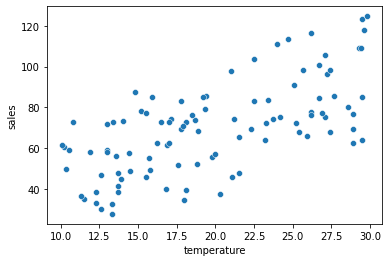

In [4]:
sns.scatterplot(x=file_beer_sales_2['temperature'], y=file_beer_sales_2 ['sales'])

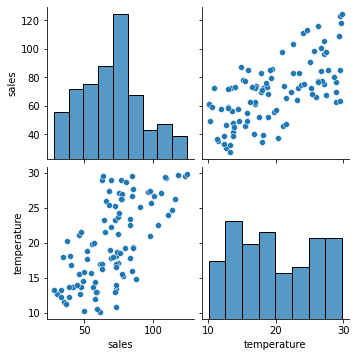

In [5]:
sns.pairplot(file_beer_sales_2)

In [8]:
# stan用データの作成
sample_num = len(file_beer_sales_2)
stan_data = {
    'N': sample_num,
    'sales': file_beer_sales_2['sales'],
    'temperature': file_beer_sales_2['temperature']
}

In [10]:
# stanファイルの読み込み

if os.path.exists('3-2-1-simple-lm.pkl'):
    sm = pickle.load(open('3-2-1-simple-lm.pkl', 'rb'))
else:
    sm = pystan.StanModel(file='book-data/3-2-1-simple-lm.stan')
   

# MCMCの実行
mcmc_result = sm.sampling(
    data=stan_data,
    seed=1,
    chains=4,
    iter=2000,
    warmup=1000,
    thin=1
)

print(mcmc_result)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_226b13443a94c1a4bc4c08517e4d6db9 NOW.
C:\Users\s44990\AppData\Local\Programs\Python\virtualenvs\py38_pystan2_17\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\s44990\AppData\Local\Temp\tmpw2g84v0w\stanfit4anon_model_226b13443a94c1a4bc4c08517e4d6db9_1813754003902316886.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


CompileError: command 'C:\\Program Files (x86)\\Microsoft Visual Studio\\2019\\BuildTools\\VC\\Tools\\MSVC\\14.29.30037\\bin\\HostX86\\x64\\cl.exe' failed with exit status 2